In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import matplotlib as matplotlib
import numpy as np

In-[period] and calendar grosses
Monthly, quarterly, season, and yearly charts can be viewed either by “in-[period] releases” or “calendar grosses”. Viewing by in-[period] releases shows total box office results for releases during that period, regardless of when the money was made. For example, viewing by in-year releases for 2019 shows box office results for all movies released in 2019. A movie released in 2018 will not appear on this chart even if it continued to earn money in 2019. Viewing by calendar grosses shows box office results within a given time period, regardless of when the movies were released. For example, viewing by calendar grosses for 2019 shows box office results for all movies that earned money in 2019. A movie released in 2018 may appear on this chart if it continued to earn money in 2019.

Calendar grosses are based on daily box office receipts or, when daily data is not available, estimates are used and are based on weekend and weekly data and historical box office trends. In cases where a final reported gross is different from its last reported gross for a given movie, the difference is assigned to the two weeks after the last reported gross date. In most cases, this reflects receipts that have trickled in after a movie has stopped being tracked for reportage. Since box office has been more closely tracked in recent years, the calendar gross data is generally considered more comprehensive after 2001, while pre-2001 estimates are considered approximate. Accuracy of calendar grosses improves over a wider range of time viewed.

In [2]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"] = pd.read_excel("IMDB_boxoffice_2022_2012.xlsx", sheet_name = str(year), na_values = "-" )

In [3]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"]["release_year"] = year

In [4]:
box_office_decade = pd.concat([box_office_2012,
           box_office_2013,
           box_office_2014,
           box_office_2015,
           box_office_2016,
           box_office_2017,
           box_office_2018,
           box_office_2019,
           box_office_2020,
           box_office_2021,
           box_office_2022], ignore_index=True)

In [5]:
box_office_decade.groupby("release_year").count()

,Rank,Release,Genre,Budget,Running Time,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Estimated
release_year,,,,,,,,,,,,,,
2012,200,200,0,0,0,200,198,195,193,195,200,199,199,200
2013,200,200,0,0,0,200,200,199,198,199,200,198,197,200
2014,200,200,0,0,0,200,200,200,200,200,200,199,198,200
2015,200,200,0,0,0,200,200,198,194,198,200,199,198,200
2016,200,200,0,0,0,200,200,199,198,199,200,196,198,200
2017,200,200,0,0,0,200,200,196,196,196,200,198,198,200
2018,200,200,0,0,0,200,200,198,197,198,200,198,192,200
2019,200,200,0,0,0,200,199,197,196,197,200,136,196,200
2020,200,200,0,0,0,200,195,184,153,180,200,6,198,200


In [6]:
box_office_decade.rename(columns = {"Release": "primary_title"}, inplace= True)
box_office_decade.drop(columns = "Estimated", inplace = True)

In [7]:
con = sqlite3.connect('..\im.db')

cursor = con.cursor()


# Execute the query
# (This is a special query for finding the table names. You don't need to memorize it.)
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names

table_names = cursor.fetchall()

table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [8]:
movie_basics = pd.read_sql("""

SELECT  *
FROM movie_basics


""", con)

In [9]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [10]:
movies = pd.merge(box_office_decade, movie_basics, how = "inner", on = "primary_title")

In [11]:
movies.drop(columns= ["start_year", "original_title", "Genre", "Budget", "Running Time"], inplace= True)

In [12]:
movies["genre1"] = movies["genres"].str.split(',', expand = True)[0]
movies["genre2"] = movies["genres"].str.split(',', expand = True)[1]
movies["genre3"] = movies["genres"].str.split(',', expand = True)[2]
movies.drop(columns= ["genres", "% of Total"], inplace= True)

In [13]:
movies.sample(10)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rank             2441 non-null   int64         
 1   primary_title    2441 non-null   object        
 2   Gross            2441 non-null   int64         
 3   Max Th           2437 non-null   object        
 4   Opening          2413 non-null   object        
 5   Open Th          2413 non-null   object        
 6   Open             2441 non-null   datetime64[ns]
 7   Close            2015 non-null   object        
 8   Distributor      2415 non-null   object        
 9   release_year     2441 non-null   int64         
 10  movie_id         2441 non-null   object        
 11  runtime_minutes  2113 non-null   float64       
 12  genre1           2407 non-null   object        
 13  genre2           1752 non-null   object        
 14  genre3           1203 non-null   object 

In [14]:
movies_clean = movies
movies_clean.drop(columns = ["Max Th", "Opening", "Open Th"])

,Rank,primary_title,Gross,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3
0,1,The Avengers,623357910,2022-05-04,Oct 4,Walt Disney Studios Motion Pictures,2012,tt0848228,143.0,Action,Adventure,Sci-Fi
1,2,The Dark Knight Rises,448139099,2022-07-20,Dec 13,Warner Bros.,2012,tt1345836,164.0,Action,Thriller,None
2,3,The Hunger Games,408010692,2022-03-23,Sep 6,Lionsgate,2012,tt1392170,142.0,Action,Adventure,Sci-Fi
3,4,Skyfall,304360277,2022-11-09,Mar 10,Sony Pictures Entertainment (SPE),2012,tt1074638,143.0,Action,Adventure,Thriller
4,5,The Hobbit: An Unexpected Journey,303003568,2022-12-14,Apr 25,Warner Bros.,2012,tt0903624,169.0,Adventure,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...
2436,193,The Territory,26464,2022-08-19,NaN,Picturehouse Entertainment,2022,tt2574238,40.0,Documentary,News,None
2437,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4370784,115.0,Drama,History,None
2438,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4677348,98.0,Horror,None,None
2439,198,1982,23241,2022-06-10,NaN,Tricycle Logic,2022,tt2388621,90.0,Drama,None,None


In [15]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rank             2441 non-null   int64         
 1   primary_title    2441 non-null   object        
 2   Gross            2441 non-null   int64         
 3   Max Th           2437 non-null   object        
 4   Opening          2413 non-null   object        
 5   Open Th          2413 non-null   object        
 6   Open             2441 non-null   datetime64[ns]
 7   Close            2015 non-null   object        
 8   Distributor      2415 non-null   object        
 9   release_year     2441 non-null   int64         
 10  movie_id         2441 non-null   object        
 11  runtime_minutes  2113 non-null   float64       
 12  genre1           2407 non-null   object        
 13  genre2           1752 non-null   object        
 14  genre3           1203 non-null   object 

In [16]:
movies_per_year = movies.groupby("release_year")["release_year"].count()
years = movies["release_year"].value_counts().keys().sort_values()
values = movies["release_year"].value_counts()

years

Int64Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64')

In [17]:
avg_per_genre = movies_clean.groupby("genre1")["Gross"].mean().sort_values(ascending= False)
avg_per_genre

genre1
Family         2.094847e+08
Musical        2.011514e+08
Music          1.022857e+08
Adventure      9.292451e+07
Action         8.518845e+07
Fantasy        8.035287e+07
Sci-Fi         7.338972e+07
Animation      6.912348e+07
Crime          3.989427e+07
Horror         3.743442e+07
Comedy         3.418099e+07
Documentary    3.107247e+07
Thriller       3.052411e+07
Biography      3.038523e+07
Drama          3.012518e+07
Romance        1.215888e+07
Mystery        1.165593e+07
Western        5.399732e+06
Sport          5.310554e+06
War            3.727550e+05
Name: Gross, dtype: float64

<ipython-input-18-4f165568877b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_per_genre.keys(), rotation=40)


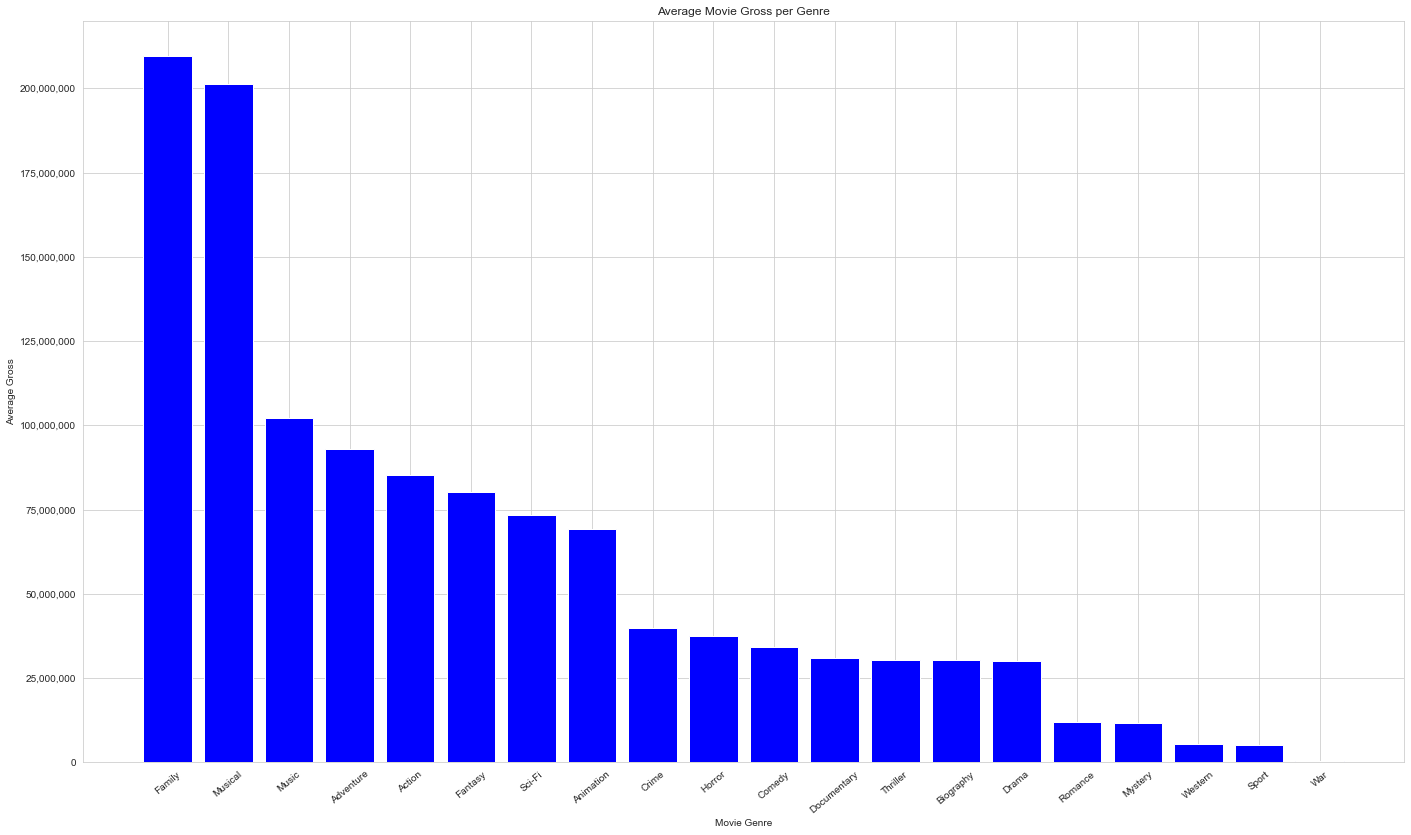

In [18]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(avg_per_genre.keys(), avg_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_xticklabels(avg_per_genre.keys(), rotation=40)
ax.set_ylabel("Average Gross")
ax.set_title('Average Movie Gross per Genre')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.show();

In [19]:
movies_clean["release_month"] = movies_clean["Open"].apply(lambda x: x.strftime("%b"))

movies_clean

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month
0,1,The Avengers,623357910,"4,349","$207,438,708","4,349",2022-05-04,Oct 4,Walt Disney Studios Motion Pictures,2012,tt0848228,143.0,Action,Adventure,Sci-Fi,May
1,2,The Dark Knight Rises,448139099,"4,404","$160,887,295","4,404",2022-07-20,Dec 13,Warner Bros.,2012,tt1345836,164.0,Action,Thriller,None,Jul
2,3,The Hunger Games,408010692,"4,137","$152,535,747","4,137",2022-03-23,Sep 6,Lionsgate,2012,tt1392170,142.0,Action,Adventure,Sci-Fi,Mar
3,4,Skyfall,304360277,"3,526","$88,364,714","3,505",2022-11-09,Mar 10,Sony Pictures Entertainment (SPE),2012,tt1074638,143.0,Action,Adventure,Thriller,Nov
4,5,The Hobbit: An Unexpected Journey,303003568,"4,100","$84,617,303","4,045",2022-12-14,Apr 25,Warner Bros.,2012,tt0903624,169.0,Adventure,Family,Fantasy,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,193,The Territory,26464,7,"$26,464",7,2022-08-19,NaN,Picturehouse Entertainment,2022,tt2574238,40.0,Documentary,News,None,Aug
2437,194,The Innocents,25705,32,"$12,330",32,2022-05-13,NaN,IFC Films,2022,tt4370784,115.0,Drama,History,None,May
2438,194,The Innocents,25705,32,"$12,330",32,2022-05-13,NaN,IFC Films,2022,tt4677348,98.0,Horror,None,None,May
2439,198,1982,23241,2,"$4,900",1,2022-06-10,NaN,Tricycle Logic,2022,tt2388621,90.0,Drama,None,None,Jun


In [20]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

movies_clean['month'] = pd.Categorical(movies_clean['release_month'], categories=months, ordered=True)

movies_clean.sort_values(by="month",inplace=True)  # same as you have now; can use inplace=True

months = movies_clean.groupby("month")["Gross"].mean().keys()
avg_gross_per_month = movies_clean.groupby("month")["Gross"].mean()

<ipython-input-21-77d1f0f46d86>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=40)


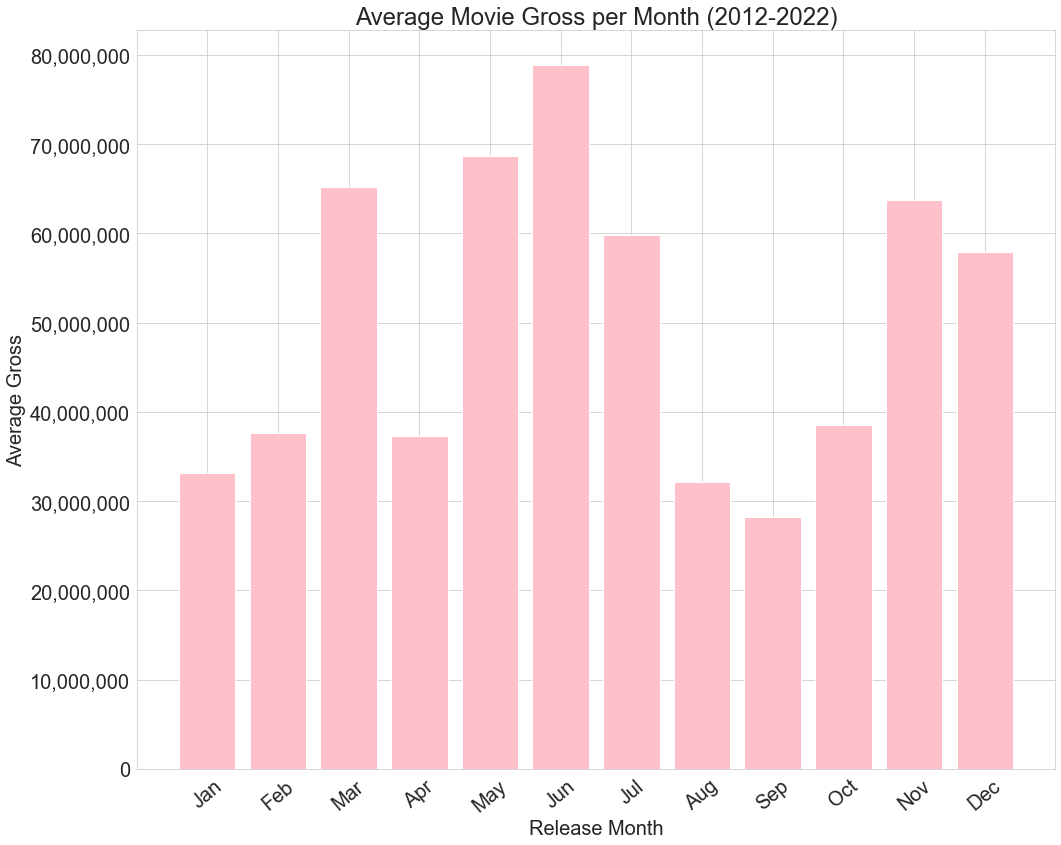

In [21]:
fig, ax = plt.subplots(figsize=(15,12))

# sets up bar plot
ax.bar(months, avg_gross_per_month, color = "pink")
ax.set_xlabel('Release Month')
ax.set_xticklabels(months, rotation=40)
ax.set_ylabel('Average Gross')
ax.set_title('Average Movie Gross per Month (2012-2022)')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

In [22]:
total_gross_per_year = movies_clean.groupby("release_year")["Gross"].sum()
years = total_gross_per_year.keys()

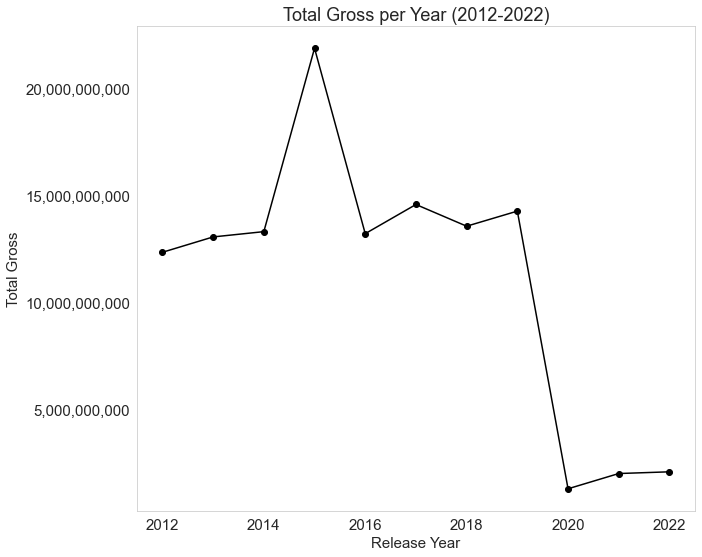

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

# sets up bar plot
ax.plot(years, total_gross_per_year, color = "k",  marker = 'o')
ax.set_xlabel('Release Year')
ax.set_ylabel('Total Gross')
ax.set_title('Total Gross per Year (2012-2022)')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.grid()
plt.tight_layout()
plt.show();

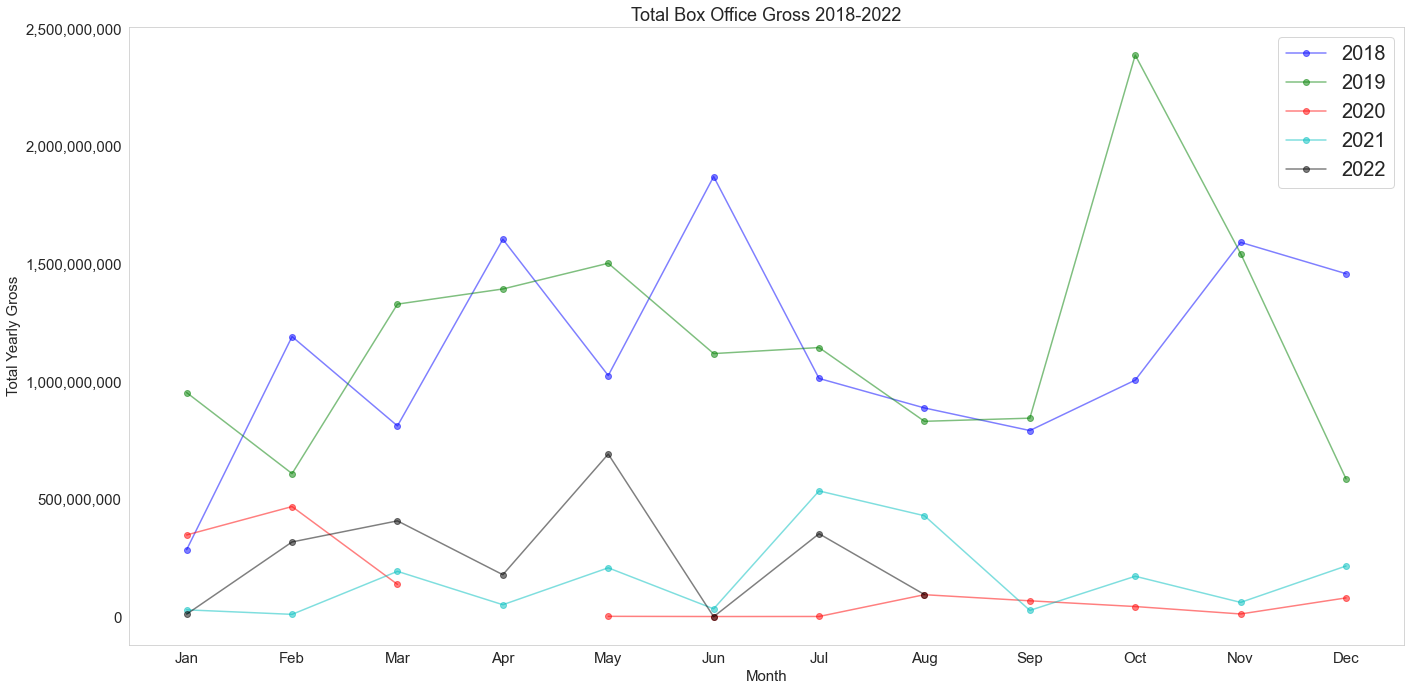

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

gross_per_month_year = movies_clean.groupby(["release_year", "month"])["Gross"].sum()
colors = ["b", "g", "r", "c", "k"]
years = [2018, 2019, 2020, 2021, 2022]
for year,color in zip(years, colors):
    ax.plot(months, gross_per_month_year[year], c = color,  marker = 'o', alpha = .5, label= f'{year}')
ax.set_xlabel('Month')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Total Yearly Gross')
ax.set_title(f'Total Box Office Gross 2018-2022')
plt.rcParams.update({'font.size': 20})
plt.grid()
plt.tight_layout()
leg = ax.legend();
plt.show();

In [25]:
movies_clean.runtime_minutes.dropna(inplace = True)
movies_clean.loc[movies_clean.genre1 == "War"]
movies_clean["runtime_minutes"][2197] = 149

<ipython-input-25-167f9b898914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean["runtime_minutes"][2197] = 149


In [26]:
avg_runtime_per_genre = movies_clean.groupby("genre1")["runtime_minutes"].mean().sort_values(ascending= False)

avg_runtime_per_genre

genre_for_runtime = avg_runtime_per_genre.keys()

<ipython-input-27-7a3558e62075>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_for_runtime, rotation=90)


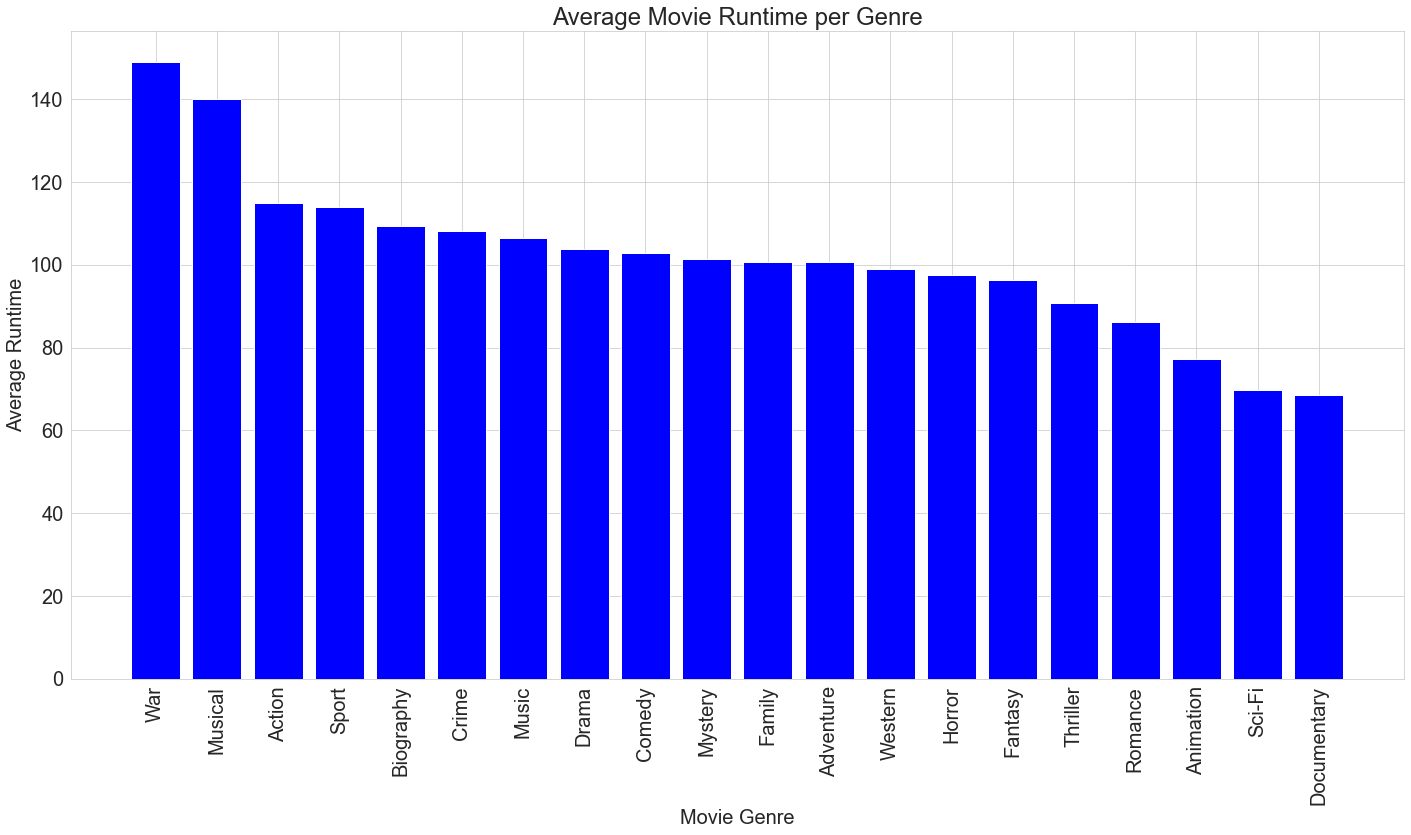

In [27]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(genre_for_runtime, avg_runtime_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_xticklabels(genre_for_runtime, rotation=90)
ax.set_ylabel("Average Runtime")
ax.set_title('Average Movie Runtime per Genre')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.show();

In [28]:
movies_clean.head()

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month,month
737,199,Gimme Shelter,1359910,385,689070,385,2022-01-24,Feb 27,Roadside Attractions,2014,tt1657510,101.0,Drama,None,None,Jan,Jan
111,102,One for the Money,26414527,"2,737","$11,515,790","2,737",2022-01-27,Apr 12,Lionsgate,2012,tt1598828,91.0,Action,Comedy,Crime,Jan,Jan
2279,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,tt4060234,50.0,Documentary,Sport,None,Jan,Jan
2278,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,tt1698576,84.0,Drama,None,None,Jan,Jan
384,118,Parker,17616641,2238,"$7,008,222","2,224",2022-01-25,Apr 4,FilmDistrict,2013,tt1904996,118.0,Action,Crime,Thriller,Jan,Jan


In [29]:
budgets = pd.read_excel("tn_movie_budgets.xlsx")

budgets

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
5777,Red 11,7000,0,0
5778,Following,6000,48482,240495
5779,Return to the Land of Wonders,5000,1338,1338
5780,A Plague So Pleasant,1400,0,0


In [30]:
movies_clean = pd.merge(movies_clean, budgets, how = "left", on = "primary_title")

In [31]:
directors = pd.read_sql("""

SELECT  *
FROM directors


""", con)

directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [32]:
persons = pd.read_sql("""

SELECT  person_id, primary_name
FROM persons


""", con)

persons

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [33]:
movie_directors = pd.merge(directors, persons, how = "inner", on = "person_id")

In [34]:
movies = pd.merge(movies_clean, movie_directors, how = "left", on = "movie_id").drop_duplicates(subset="primary_title")

movies.rename(columns = {"primary_name": "director"}, inplace= True)

movies['production_budget'].fillna(int(movies['production_budget'].mean()), inplace=True)

movies['worldwide_gross'].fillna(int(movies['worldwide_gross'].mean()), inplace=True)

movies['director'].fillna("Praveen Gowtham", inplace=True)

movies["profit"] = movies.worldwide_gross - movies.production_budget

movies["profit_margin"] = ((movies.worldwide_gross - movies.production_budget)/movies.worldwide_gross)

movies["profitable"] = movies["profit"] > 0

In [35]:
movies

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,...,release_month,month,production_budget,domestic_gross,worldwide_gross,person_id,director,profit,profit_margin,profitable
0,199,Gimme Shelter,1359910,385,689070,385,2022-01-24,Feb 27,Roadside Attractions,2014,...,Jan,Jan,52722794.0,NaN,1.766738e+08,nm0470323,Ron Krauss,123951028.0,0.701581,True
1,102,One for the Money,26414527,"2,737","$11,515,790","2,737",2022-01-27,Apr 12,Lionsgate,2012,...,Jan,Jan,42000000.0,26414527.0,3.619722e+07,nm1455688,Julie Anne Robinson,-5802779.0,-0.160310,False
5,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,...,Jan,Jan,52722794.0,NaN,1.766738e+08,nm4352732,Darcy Hennessey Turenne,123951028.0,0.701581,True
8,118,Parker,17616641,2238,"$7,008,222","2,224",2022-01-25,Apr 4,FilmDistrict,2013,...,Jan,Jan,35000000.0,17616641.0,4.854339e+07,nm0000431,Taylor Hackford,13543388.0,0.278996,True
10,169,Albert Nobbs,3014696,245,"$696,088",245,2022-01-27,May 17,Roadside Attractions,2012,...,Jan,Jan,7500000.0,3014696.0,8.539003e+06,nm0006554,Rodrigo García,1039003.0,0.121677,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,92,All the Money in the World,25113707,2123,"$5,584,684","2,074",2022-12-25,Mar 22,TriStar Pictures,2017,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm0000631,Ridley Scott,123951028.0,0.701581,True
6972,1,Rogue One: A Star Wars Story,532177324,4157,"$155,081,681","4,157",2022-12-16,May 4,Walt Disney Studios Motion Pictures,2016,...,Dec,Dec,200000000.0,532177324.0,1.049103e+09,nm2284484,Gareth Edwards,849102856.0,0.809361,True
6977,173,Ben Is Back,3703184,598,"$80,734",4,2022-12-07,Feb 21,Roadside Attractions,2018,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm0373282,Peter Hedges,123951028.0,0.701581,True
6978,199,Mr. Six,1415450,32,"$332,117",30,2022-12-24,Jan 31,China Lion Film Distribution,2015,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm1299690,Hu Guan,123951028.0,0.701581,True


In [36]:
top_15_dir_by_profit = movies[["director", "profit"]].sort_values(by = "profit", ascending = False)[:15]

top_15_dir_by_profit

,director,profit
2495,Anthony Russo,1.748134e+09
3277,Colin Trevorrow,1.433855e+09
2250,James Wan,1.328723e+09
3014,Joss Whedon,1.292936e+09
1120,Ryan Coogler,1.148258e+09
3453,J.A. Bayona,1.135773e+09
6358,Adam Green,1.122470e+09
1720,Marilyn Barnes,1.099200e+09
4087,Pierre Coffin,1.086336e+09
3146,Joss Whedon,1.072414e+09


<ipython-input-37-7d63a6d78dfa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_15_dir_by_profit["director"], rotation=75)


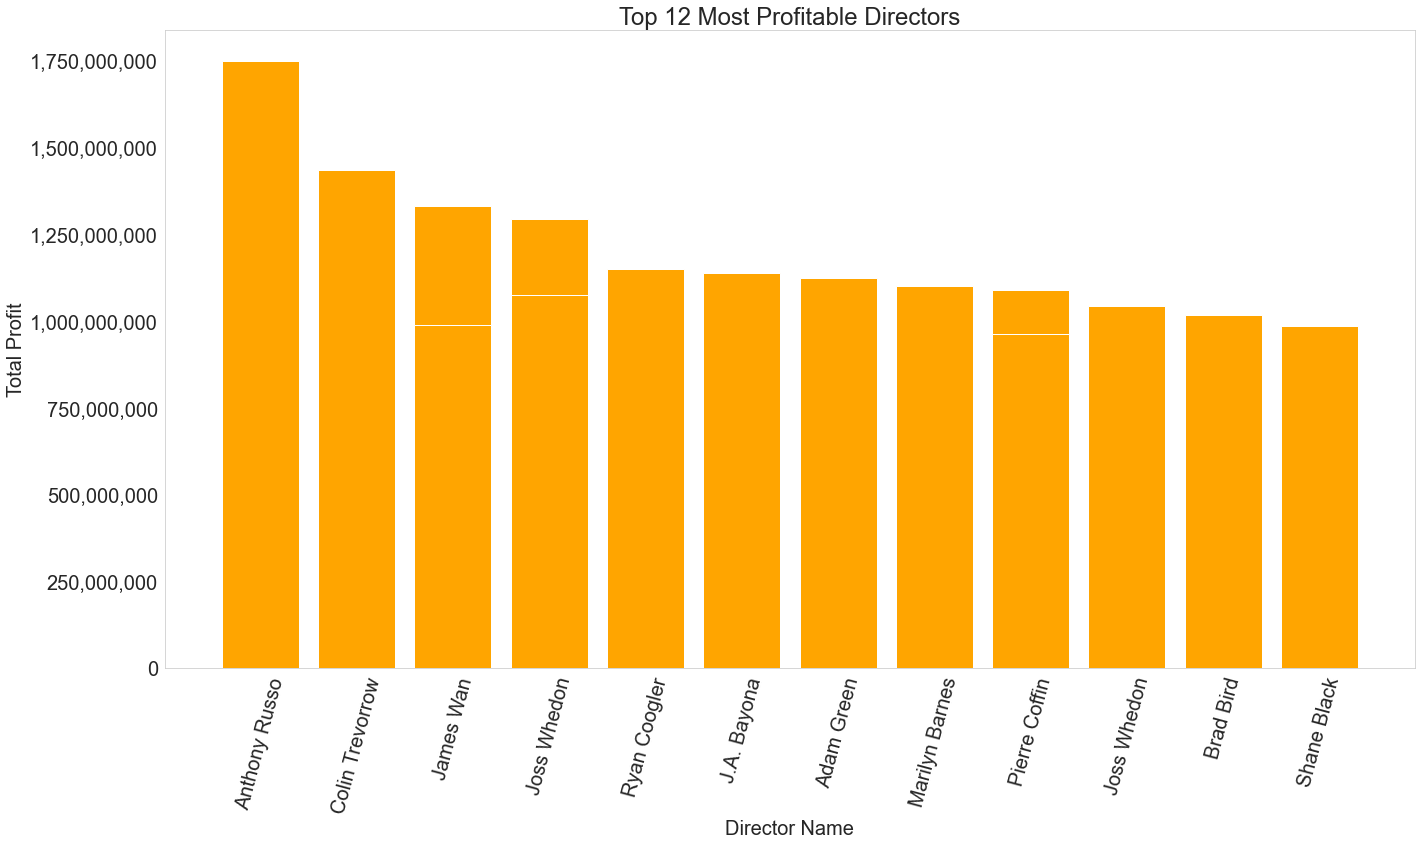

In [37]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(top_15_dir_by_profit["director"], top_15_dir_by_profit["profit"], color = "orange")
ax.set_xlabel('Director Name')
ax.set_xticklabels(top_15_dir_by_profit["director"], rotation=75)
ax.set_ylabel("Total Profit")
ax.set_title('Top 12 Most Profitable Directors')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.grid()
plt.tight_layout()
plt.show();

Creating a new data frame with only the top 15 most profitable direcotors.

In [38]:
df_list = []
for director in top_15_dir_by_profit["director"]:
    df_list.append(movies.loc[movies.director == director])
top_prof_movies = pd.concat(df_list)

In [39]:
top_prof_movies.groupby(["director", "genre1"])["profit"].sum()

director         genre1   
Adam Green       Adventure    1.122470e+09
Anthony Russo    Action       3.306557e+09
Brad Bird        Action       1.042521e+09
Colin Trevorrow  Action       1.433855e+09
                 Comedy       3.672318e+06
                 Crime        1.239510e+08
F. Gary Gray     Action       8.779463e+08
                 Biography    1.741830e+08
J.A. Bayona      Action       1.135773e+09
                 Animation    3.414530e+06
                 Drama        1.295906e+08
James Wan        Action       4.631235e+09
                 Drama        2.479021e+08
                 Horror       8.439023e+08
Joss Whedon      Action       4.730700e+09
Marilyn Barnes   Family       1.099200e+09
Pierre Coffin    Adventure    5.890562e+09
Ryan Coogler     Action       1.148258e+09
                 Biography    1.664964e+07
Shane Black      Action       1.096477e+09
Name: profit, dtype: float64

In [40]:
top_20_dir_by_profit_margin = movies[["director", "profit_margin"]].sort_values(by = "profit_margin", ascending = False)[:20]
top_20_dir_by_profit_margin

,director,profit_margin
3832,Travis Cluff,0.997599
899,William Brent Bell,0.990173
2347,Levan Gabriadze,0.984463
29,Robbie Walsh,0.982077
1032,Jordan Peele,0.980420
5518,Jill Wong,0.977010
3151,Bradley Parker,0.976422
5644,John R. Leonetti,0.974695
6486,Nitesh Tiwari,0.967759
3573,James DeMonaco,0.967129


In [41]:
movies.loc[movies.genre1 == "Musical"]

movies.drop(index = [4201, 1659 ], inplace = True)

<ipython-input-42-e85ec6183c27>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_prof_per_genre.keys(), rotation=50)


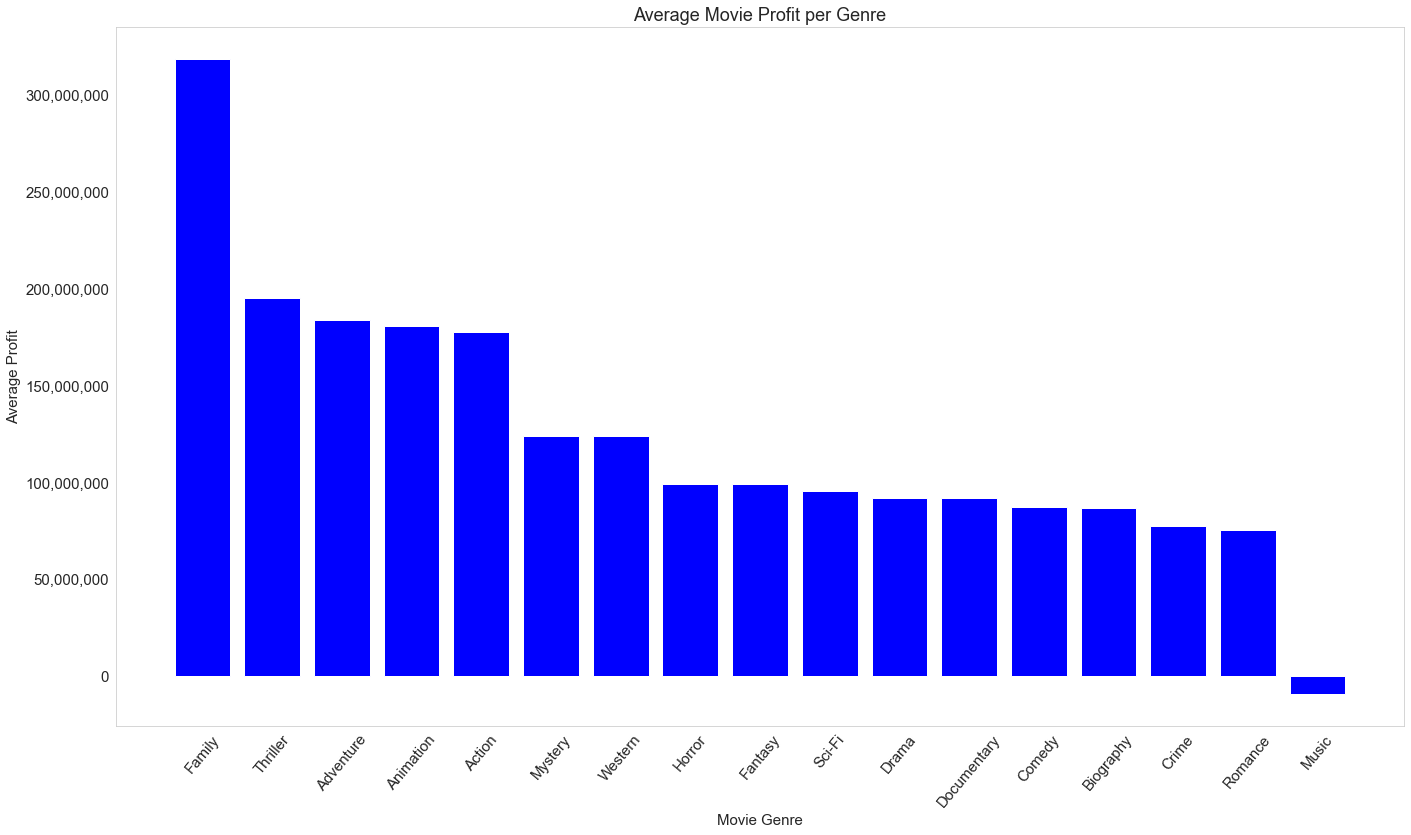

In [42]:
avg_prof_per_genre = movies.groupby("genre1")["profit"].mean().sort_values(ascending= False)


fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(avg_prof_per_genre.keys(), avg_prof_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_ylabel("Average Profit")
ax.set_title('Average Movie Profit per Genre')
ax.set_xticklabels(avg_prof_per_genre.keys(), rotation=50)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 20})
plt.grid()
plt.tight_layout()
plt.show();

In [43]:
movies.drop(columns = ["domestic_gross"], inplace = True)
movies.rename(columns={"Gross": "domestic_gross"}, inplace= True)


In [44]:
movies.runtime_minutes.fillna(movies.runtime_minutes.mean(), inplace= True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 6980
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               1702 non-null   int64         
 1   primary_title      1702 non-null   object        
 2   domestic_gross     1702 non-null   int64         
 3   Max Th             1698 non-null   object        
 4   Opening            1682 non-null   object        
 5   Open Th            1682 non-null   object        
 6   Open               1702 non-null   datetime64[ns]
 7   Close              1458 non-null   object        
 8   Distributor        1678 non-null   object        
 9   release_year       1702 non-null   int64         
 10  movie_id           1702 non-null   object        
 11  runtime_minutes    1702 non-null   float64       
 12  genre1             1690 non-null   object        
 13  genre2             1378 non-null   object        
 14  genre3  

In [45]:
movies

,Rank,primary_title,domestic_gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,...,genre3,release_month,month,production_budget,worldwide_gross,person_id,director,profit,profit_margin,profitable
0,199,Gimme Shelter,1359910,385,689070,385,2022-01-24,Feb 27,Roadside Attractions,2014,...,None,Jan,Jan,52722794.0,1.766738e+08,nm0470323,Ron Krauss,123951028.0,0.701581,True
1,102,One for the Money,26414527,"2,737","$11,515,790","2,737",2022-01-27,Apr 12,Lionsgate,2012,...,Crime,Jan,Jan,42000000.0,3.619722e+07,nm1455688,Julie Anne Robinson,-5802779.0,-0.160310,False
5,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,...,None,Jan,Jan,52722794.0,1.766738e+08,nm4352732,Darcy Hennessey Turenne,123951028.0,0.701581,True
8,118,Parker,17616641,2238,"$7,008,222","2,224",2022-01-25,Apr 4,FilmDistrict,2013,...,Thriller,Jan,Jan,35000000.0,4.854339e+07,nm0000431,Taylor Hackford,13543388.0,0.278996,True
10,169,Albert Nobbs,3014696,245,"$696,088",245,2022-01-27,May 17,Roadside Attractions,2012,...,None,Jan,Jan,7500000.0,8.539003e+06,nm0006554,Rodrigo García,1039003.0,0.121677,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,92,All the Money in the World,25113707,2123,"$5,584,684","2,074",2022-12-25,Mar 22,TriStar Pictures,2017,...,Drama,Dec,Dec,52722794.0,1.766738e+08,nm0000631,Ridley Scott,123951028.0,0.701581,True
6972,1,Rogue One: A Star Wars Story,532177324,4157,"$155,081,681","4,157",2022-12-16,May 4,Walt Disney Studios Motion Pictures,2016,...,Sci-Fi,Dec,Dec,200000000.0,1.049103e+09,nm2284484,Gareth Edwards,849102856.0,0.809361,True
6977,173,Ben Is Back,3703184,598,"$80,734",4,2022-12-07,Feb 21,Roadside Attractions,2018,...,None,Dec,Dec,52722794.0,1.766738e+08,nm0373282,Peter Hedges,123951028.0,0.701581,True
6978,199,Mr. Six,1415450,32,"$332,117",30,2022-12-24,Jan 31,China Lion Film Distribution,2015,...,None,Dec,Dec,52722794.0,1.766738e+08,nm1299690,Hu Guan,123951028.0,0.701581,True


In [46]:
domestic_gross_per_dist = movies.groupby("Distributor")["domestic_gross"].mean().sort_values(ascending = False)[:10]
top_10_dist = domestic_gross_per_dist.keys()

<ipython-input-53-c340d9ef5f53>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(domestic_gross_per_dist.keys(), rotation=90)


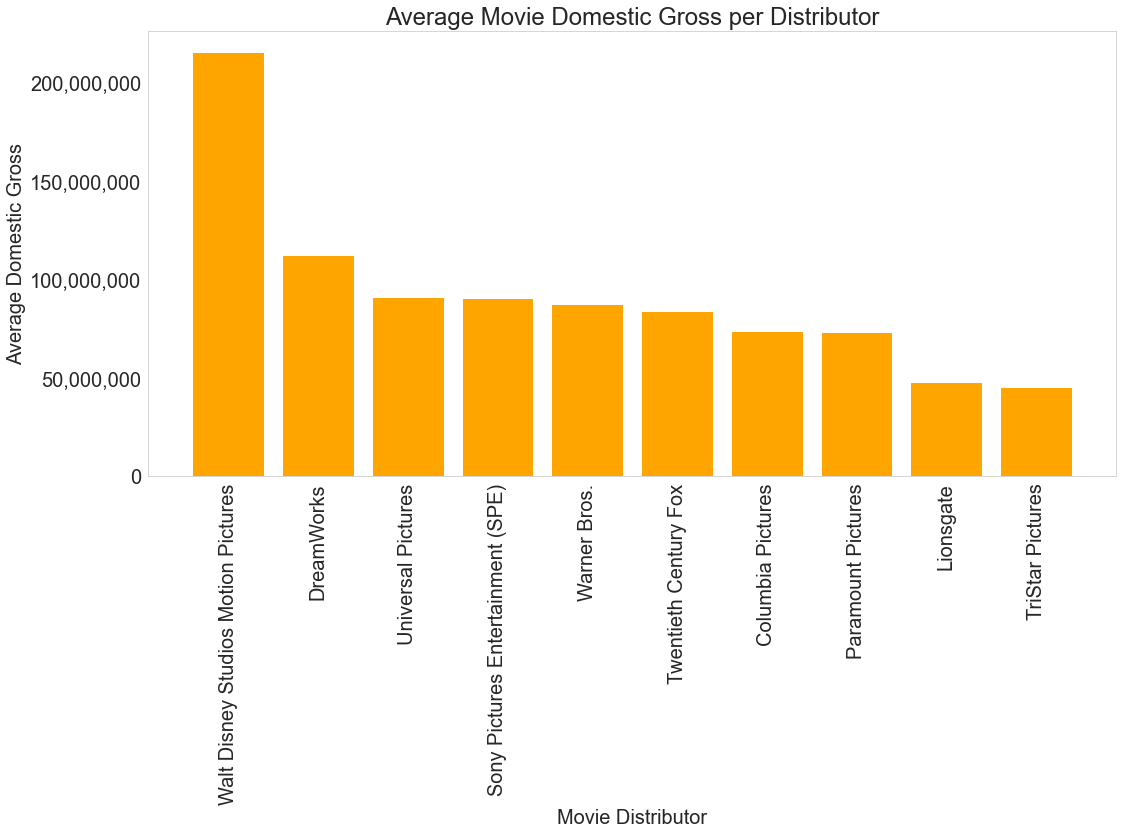

In [53]:
fig, ax = plt.subplots(figsize=(16,12))

# sets up bar plot
ax.bar(domestic_gross_per_dist.keys(), domestic_gross_per_dist, color = "orange")
ax.set_xlabel('Movie Distributor')
ax.set_ylabel("Average Domestic Gross")
ax.set_title('Average Movie Domestic Gross per Distributor')
ax.set_xticklabels(domestic_gross_per_dist.keys(), rotation=90)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 20})
plt.grid()
plt.tight_layout()
plt.show();

In [49]:
movies["low_tier"] = np.where(movies['production_budget'] <= 5000000, True, False)
movies["mid_tier"] = np.where(((movies['production_budget'] > 50000000) | (movies['production_budget'] < 5000000)), True, False)
movies["high_tier"] = np.where(movies['production_budget'] >= 50000000, True, False)

movies

,Rank,primary_title,domestic_gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,...,production_budget,worldwide_gross,person_id,director,profit,profit_margin,profitable,low_tier,mid_tier,high_tier
0,199,Gimme Shelter,1359910,385,689070,385,2022-01-24,Feb 27,Roadside Attractions,2014,...,52722794.0,1.766738e+08,nm0470323,Ron Krauss,123951028.0,0.701581,True,False,True,True
1,102,One for the Money,26414527,"2,737","$11,515,790","2,737",2022-01-27,Apr 12,Lionsgate,2012,...,42000000.0,3.619722e+07,nm1455688,Julie Anne Robinson,-5802779.0,-0.160310,False,False,False,False
5,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,...,52722794.0,1.766738e+08,nm4352732,Darcy Hennessey Turenne,123951028.0,0.701581,True,False,True,True
8,118,Parker,17616641,2238,"$7,008,222","2,224",2022-01-25,Apr 4,FilmDistrict,2013,...,35000000.0,4.854339e+07,nm0000431,Taylor Hackford,13543388.0,0.278996,True,False,False,False
10,169,Albert Nobbs,3014696,245,"$696,088",245,2022-01-27,May 17,Roadside Attractions,2012,...,7500000.0,8.539003e+06,nm0006554,Rodrigo García,1039003.0,0.121677,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,92,All the Money in the World,25113707,2123,"$5,584,684","2,074",2022-12-25,Mar 22,TriStar Pictures,2017,...,52722794.0,1.766738e+08,nm0000631,Ridley Scott,123951028.0,0.701581,True,False,True,True
6972,1,Rogue One: A Star Wars Story,532177324,4157,"$155,081,681","4,157",2022-12-16,May 4,Walt Disney Studios Motion Pictures,2016,...,200000000.0,1.049103e+09,nm2284484,Gareth Edwards,849102856.0,0.809361,True,False,True,True
6977,173,Ben Is Back,3703184,598,"$80,734",4,2022-12-07,Feb 21,Roadside Attractions,2018,...,52722794.0,1.766738e+08,nm0373282,Peter Hedges,123951028.0,0.701581,True,False,True,True
6978,199,Mr. Six,1415450,32,"$332,117",30,2022-12-24,Jan 31,China Lion Film Distribution,2015,...,52722794.0,1.766738e+08,nm1299690,Hu Guan,123951028.0,0.701581,True,False,True,True


Will it be possible to graph the profit for distributor by the tier of the movie?

In [56]:
movies.groupby(["low_tier", "mid_tier", "high_tier"])

low_tier  mid_tier  high_tier
False     False     False        4.922970e+07
                    True         1.052052e+08
          True      True         1.735282e+08
True      False     False        4.846408e+07
          True      False        1.796226e+07
Name: profit, dtype: float64